In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns

In [8]:
df = pd.read_csv("matches.csv")
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
1,2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
2,3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
3,4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
4,5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,38,2020-07-07,18:00,Premier League,Matchweek 34,Tue,Away,L,1.0,2.0,...,Match Report,NaN,12.0,3.0,16.9,1.0,0.0,0.0,2020,Norwich City
2717,39,2020-07-11,12:30,Premier League,Matchweek 35,Sat,Home,L,0.0,4.0,...,Match Report,NaN,11.0,2.0,19.8,1.0,0.0,0.0,2020,Norwich City
2718,40,2020-07-14,20:15,Premier League,Matchweek 36,Tue,Away,L,0.0,1.0,...,Match Report,NaN,2.0,0.0,20.6,0.0,0.0,0.0,2020,Norwich City
2719,41,2020-07-18,17:30,Premier League,Matchweek 37,Sat,Home,L,0.0,2.0,...,Match Report,NaN,6.0,2.0,13.4,0.0,0.0,0.0,2020,Norwich City


# **BAR CHART**

In [13]:
formation_result = df[["formation", "result"]]
formation_result = formation_result.groupby(["formation", "result"])['result'].count().reset_index(name="count")
filter_formation_result = formation_result.groupby(['formation'])['count'].sum().reset_index(name='total')
filter_formation_result

,formation,total
0,3-1-4-2,16
1,3-2-4-1,4
2,3-3-3-1,12
3,3-4-1-2,69
4,3-4-3,315
5,3-4-3◆,1
6,3-5-1-1,8
7,3-5-2,183
8,4-1-2-1-2◆,26
9,4-1-3-2,1


In [14]:
filter_formation_result = filter_formation_result[filter_formation_result['total'] >= 20]
filter_formation_result = filter_formation_result['formation']
formation_result["%"] = 100 * formation_result["count"]/formation_result.groupby("formation")["count"].transform('sum')
formation_result = formation_result.pivot(index="formation", columns="result", values="%").fillna(0).reset_index().rename_axis(None, axis = 1)
formation_result = formation_result[formation_result['formation'].isin(filter_formation_result)]
formation_result

,formation,D,L,W
3,3-4-1-2,26.086957,42.028986,31.884058
4,3-4-3,25.714286,33.333333,40.952381
7,3-5-2,21.857923,49.726776,28.415301
8,4-1-2-1-2◆,26.923077,46.153846,26.923077
10,4-1-4-1,24.840764,45.859873,29.299363
11,4-2-2-2,23.809524,38.095238,38.095238
12,4-2-3-1,21.902017,35.878963,42.219020
13,4-3-1-2,26.470588,35.294118,38.235294
15,4-3-3,21.723519,28.366248,49.910233
16,4-4-1-1,11.267606,56.338028,32.394366


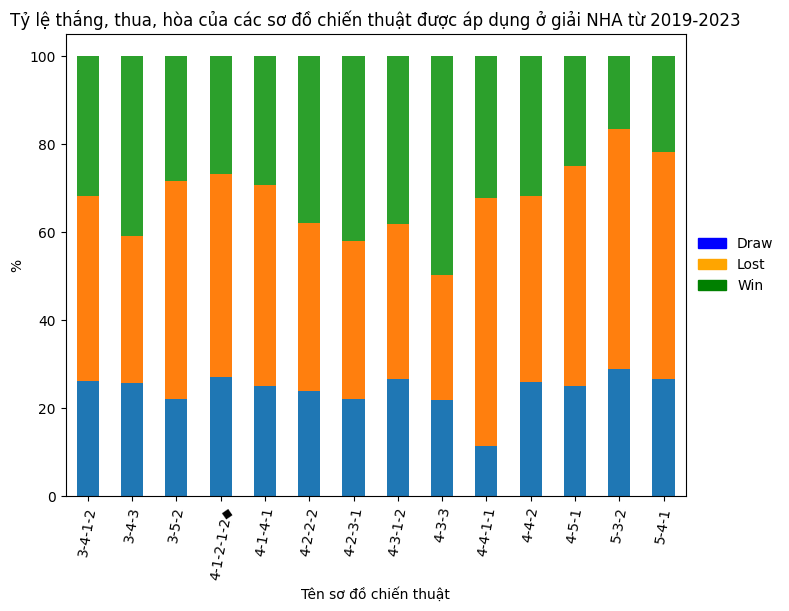

In [10]:
ax = formation_result.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0)
default_x_ticks = range(len(formation_result))
plt.xticks(default_x_ticks, formation_result['formation'], rotation=80)
plt.xlabel("Tên sơ đồ chiến thuật")
plt.ylabel("%")
plt.title("Tỷ lệ thắng, thua, hòa của các sơ đồ chiến thuật được áp dụng ở giải NHA từ 2019-2023")
top_bar = mpatches.Patch(color='blue', label='Draw')
middle_bar = mpatches.Patch(color='orange', label='Lost')
bottom_bar = mpatches.Patch(color='green', label='Win')
plt.legend(handles=[top_bar, middle_bar, bottom_bar], loc = "center left", frameon=False, bbox_to_anchor=(1, 0.5))


### Các trường dữ liệu tương tác
- formation
- result
### Xử lý dữ liệu
* gom nhóm các sơ đồ chiến thuật và result -> đếm các dòng
* lọc ra có sơ đồ chiến thuật mà có số trận áp dụng ít hơn 20 
* Từ kết quả ở 3 columns ta tính phần trăm: giá trị tại column / tổng sô trận tham gia => thay thế giá trị hiện tại bằng giá trị phần trăm mới này
* Chuyển result với 3 mẫu dữ liệu "W", "D", "L" thành 3 columns cùng với kết quả tính phần trăm ở bước đã tính trước đó
### Giải thích biểu đồ
Với mỗi sơ đồ chiến thuật mà các huấn luyện viên áp dụng trên biểu đồ, chiều dài tổng thể trên thang đo 100% và được chia làm 3 phần tương ứng với 3 màu khác nhau để biểu thị cho tỷ lệ thắng, hòa, thua của các sơ đồ chiến thuật. Phần tô màu xanh biểu diễn cho tỷ lệ hòa, màu cam biểu diễn cho tỷ lệ thua và phần màu xanh biểu diễn cho tỷ lệ thắng. 
### lý do chọn biểu đồ ***Stacked bar chart***
Biểu đồ cột chồng rất hữu ích cho việc so sánh. Dựa vào biểu đồ, ta dễ dàng quan sát để biết tỷ lệ thành phần nào chiếm tỷ lệ cao và thấp. Đồng thời cho thấy rõ tỷ lệ thắng, thua, hòa của các sơ đồ chiến thuật. Điều này giúp ích rất nhiều cho việc so sánh các sơ đồ chiến thuật với nhau. Từ đó cho thấy sơ đồ chiến thuật nào đang mang lại hiệu quả thắng lợi cao khi được áp dụng (không xét đến các yếu tố cầu thủ).
### Phân tích kết quả từ biểu đồ
* tỷ lệ thằng, thua, hòa được hiển thị rõ rệt. Trong đó sơ đồ chiến thuật nào có màu xanh lá chiếm càng nhiều thì tỷ lệ thắng khi áp dụng sơ đồ chiến thuật đó càng cao (không tính các yếu tố khác tác động vào như cầu thủ, ...). Sơ đồ nào màu vàng chiếm diện tích càng nhiều thì khi áp dụng sơ đồ chiến thuật thì tỷ lệ thua càng cao.
* Dựa vào sơ đồ ta có thẻ thấy sơ đồ 4-4-1-1 khi áp dụng thì tỷ lệ thua cực kỳ cao và cao nhất trong các sơ đồ trên, còn sơ đồ 4-3-3 khi áp dụng tỷ lệ thằng cao nhất.
* Từ đó, ta thấy sơ đồ chiến thuật 4-3-3 được áp dụng rất nhiều xuyên suốt từ 2019-2023 với 557 lần áp dụng, còn sơ đồ chiến thuật 4-4-1-1 chỉ được áp dụng vỏn vẹn 71 lần

In [11]:
team_big_6 = ['Manchester City', 'Manchester United', 'Chelsea', 'Arsenal', 'Liverpool', 'Tottenham Hotspur']
team_result = df[df['team'].isin(team_big_6)]
team_result = team_result[['team', 'result']]
team_result = team_result.groupby(['team', 'result'])['result'].count().reset_index(name="count")
team_result = team_result.pivot(index="team", columns="result", values="count").fillna(0).reset_index().rename_axis(None, axis = 1)
team_result

,team,D,L,W
0,Arsenal,27,38,70
1,Chelsea,34,34,68
2,Liverpool,25,21,89
3,Manchester City,17,22,98
4,Manchester United,37,31,69
5,Tottenham Hotspur,27,42,68


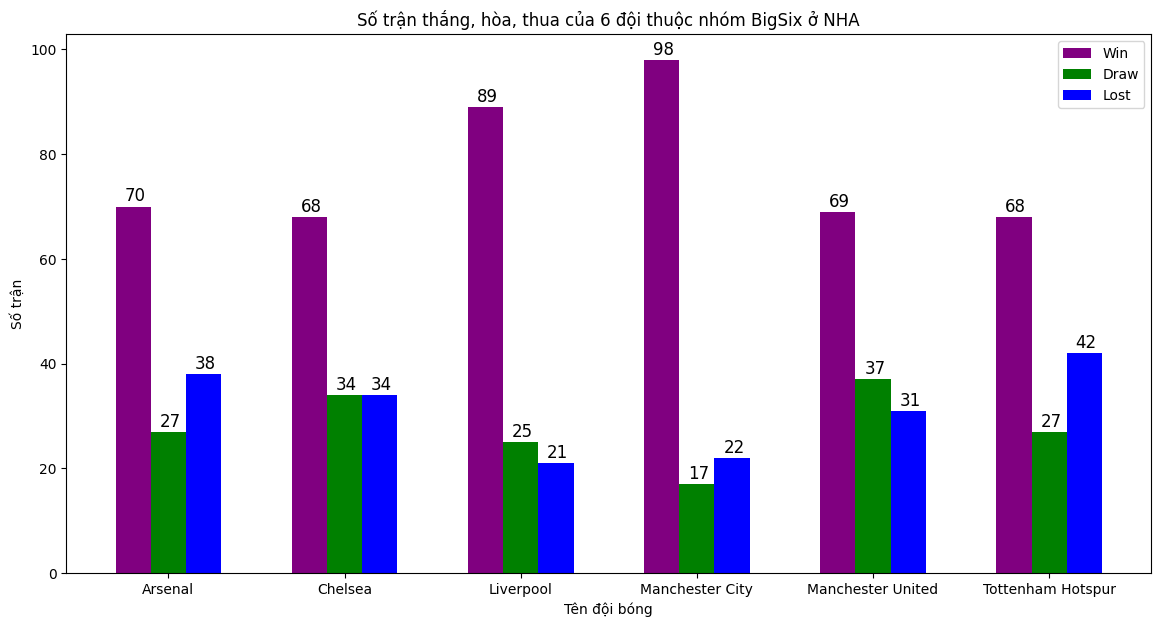

In [12]:
X_axis = np.arange(len(team_result.index))
plt.figure(figsize=(14, 7))  # thiết lập size cho bảng

plt.bar(X_axis - 0.2, team_result['W'], 0.2, label='Win', color='purple')
plt.bar(X_axis, team_result['D'], 0.2, label='Draw', color='green')
plt.bar(X_axis + 0.2, team_result['L'], 0.2, label='Lost', color='blue')
plt.xticks(X_axis, team_result['team'])
plt.title("Số trận thắng, hòa, thua của 6 đội thuộc nhóm BigSix ở NHA")
plt.xlabel("Tên đội bóng")
plt.ylabel("Số trận")

for index, data in enumerate(team_result["W"]):
    plt.text(x=index - 0.25, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

for index, data in enumerate(team_result["D"]):
    plt.text(x=index - 0.05, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

for index, data in enumerate(team_result["L"]):
    plt.text(x=index + 0.15, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

plt.legend()


### Các trường dữ liệu tương tác
- team
- result
### Xử lý dữ liệu
* Lọc dữ liệu ở trường team lấy những dòng nào có dữ liệu thuộc nhóm big six của ngoại hạng anh ('Manchester City', 'Manchester United', 'Chelsea', 'Arsenal', 'Liverpool', 'Tottenham Hotspur')
* Từ result tính tổng các trận thắng, hòa, thua -> chuyển result với 3 mẫu dữ liệu "W", "D", "L" thành 3 columns cùng với kết quả đã tính trước đó
* Từ kết quả ở 3 columns ta tính phần trăm: giá trị tại column / tổng sô trận tham gia => thay thế giá trị hiện tại bằng giá trị phần trăm mới này
### Giải thích biểu đồ
Trục x biểu diện tổng số trận đấu các đội bóng đã chơi (từ năm 2019-2023(vẫn còn đang cập nhật)), trục y biểu diễn cho tên các đội bóng nằm trong nhóm big six của ngoại hạng anh. Mội đội sẽ được biểu diễn 3 cột dữ liệu để tượng trưng cho số trận thắng, thua, hòa của mỗi đội. Cột màu tím biểu diễn số trận thắng, cột màu xanh lá biểu diễn cho số trận hòa, cột màu xanh dương biểu diễn cho số trận thua. 
### lý do chọn biểu đồ ***Multiple bar chart***
Biểu đồ nhiều cột giúp ích cho việc so sánh các trường dữ liệu. Dựa vào biểu đồ ta dễ dạng biết được đội bóng có số trận thắng, thua, hòa là bao nhiêu. Đồng thời quan sát được sự chênh lệch về độ cao của các cột dữ liệu, điều này rất hữu ích cho việc so sánh các đội bóng với nhau  trên cùng một trường dữ liệu. Từ đó cho thấy đội bóng nào đã và đang thể hiện bộ mặt tích cực (nhờ số trận thắng) và đội bóng nào đang thể hiện bộ mặt bết bát (nhờ số trận thua).
### Phân tích kết quả từ biểu đồ
* Từ biểu độ ta thấy sự chênh lệch rõ ràng về số trận thằng, thua và hòa của các đội bóng thuộc big six. Cột thằng (màu tím) càng cao thì thể hiện đội bóng càng mạnh trong giai đoạn (2019-2023), cột xanh nước biển càng cao thì thể hiện đội bóng càng yếu trong giai đoạn (2019-2023)
* Qua biểu đồ, ta có thể thấy Manchester City áp đảo với 98 trận thắng và chỉ vỏn vẹn 22 trận thua (gần như thấp nhất chỉ sau Liverpool). Còn Tottenham Hotspur có cột thua cao nhất (không quá chênh lệch nhiều).
* Từ đó, ta thấy trong giai đoạn 2019-2023 ở ngoại hạng anh, Manchester City là đội mạnh nhất có các chỉ số thằng, thua, hòa đều vượt trội so với phần còn lại.